In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [72]:
test_data = pd.read_csv('test.csv')

train_data = pd.read_csv('train.csv')

In [79]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train_data = train_data.drop(['Name', 'Embarked', 'Ticket', 'Cabin'], axis=1)

label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [6]:
df_all_corr = train_data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

# Rename columns for better readability
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)

# Filter the results for correlations involving the 'Age' feature
age_corr = df_all_corr[df_all_corr['Feature 1'] == 'Age']

# Display the filtered correlations
print(age_corr)

   Feature 1    Feature 2  Correlation Coefficient
4        Age          Age                 1.000000
14       Age       Pclass                 0.369226
18       Age        SibSp                 0.308247
26       Age        Parch                 0.189119
36       Age         Fare                 0.096067
38       Age          Sex                 0.093254
44       Age     Survived                 0.077221
51       Age  PassengerId                 0.036847


In [9]:
# Calculate the median age for each group (Sex and Pclass)
age_by_pclass_sex = train_data.groupby(['Sex', 'Pclass']).median()['Age']

# Display the median ages for each group
for pclass in range(1, 4):
    for sex in [0, 1]:
        print('Median age of Pclass {} {}s: {}'.format(pclass, 'male' if sex == 1 else 'female', age_by_pclass_sex[sex][pclass]))

# Calculate and print the overall median age
print('Median age of all passengers: {}'.format(train_data['Age'].median()))


Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [10]:
train_data['Age'] = train_data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [39]:
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Create the models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Fit the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Calculate the accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# Print the accuracies
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Decision Tree Accuracy: {accuracy_decision_tree}")
print(f"Random Forest Accuracy: {accuracy_random_forest}")

Logistic Regression Accuracy: 0.8268156424581006
Decision Tree Accuracy: 0.7821229050279329
Random Forest Accuracy: 0.8100558659217877


In [61]:
# Create a Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('log_reg', log_reg),
    ('decision_tree', decision_tree),
    ('random_forest', random_forest)
], final_estimator=SVC())

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_stacking = stacking_clf.predict(X_test)

# Calculate accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

print(f"Stacking Classifier Accuracy: {accuracy_stacking * 100:.2f}%")

Stacking Classifier Accuracy: 83.80%


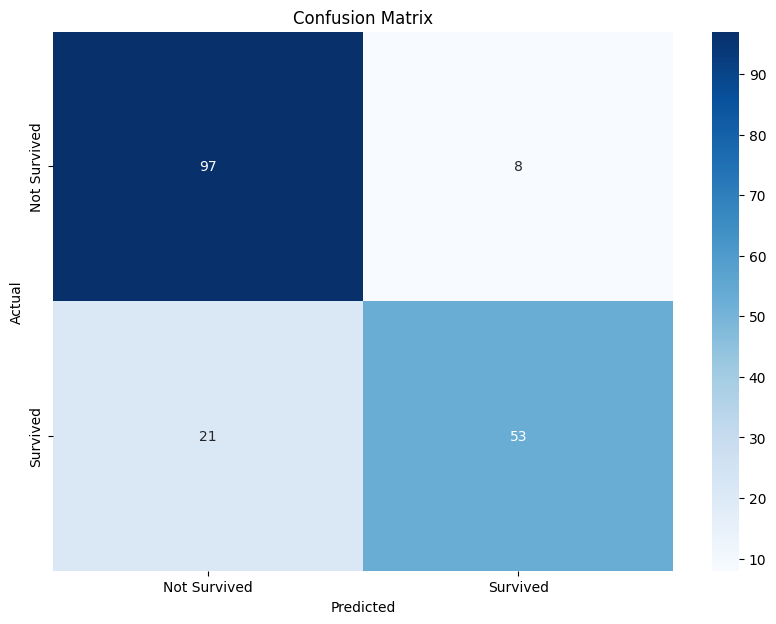

In [62]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
test_data = test_data.drop(['Name', 'Embarked', 'Ticket', 'Cabin'], axis=1)

label_encoder = LabelEncoder()
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])

In [80]:
# Calculate the median age for each group (Sex and Pclass)
age_by_pclass_sex_test = test_data.groupby(['Sex', 'Pclass']).median()['Age']

# Display the median ages for each group
for pclass in range(1, 4):
    for sex in [0, 1]:
        print('Median age of Pclass {} {}s: {}'.format(pclass, 'male' if sex == 1 else 'female', age_by_pclass_sex_test[sex][pclass]))

# Calculate and print the overall median age
print('Median age of all passengers: {}'.format(test_data['Age'].median()))

# Fill missing Age values with the medians of Sex and Pclass groups in test_data
test_data['Age'] = test_data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# Check for remaining null values
print(test_data['Age'].isnull().sum())

Median age of Pclass 1 females: 41.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 24.0
Median age of Pclass 2 males: 28.0
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 24.0
Median age of all passengers: 27.0
0


In [87]:
X_test_final = test_data.drop(['PassengerId'], axis=1)
X_test_final['Fare'] = X_test_final['Fare'].fillna(X_test_final['Fare'].median())
X_test_final.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [88]:
y_pred_stacking_final = stacking_clf.predict(X_test_final)

In [89]:
# Create a DataFrame for the predictions
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred_stacking_final
})

# Save the predictions to a CSV file
submission.to_csv('prediction_submission_v2.csv', index=False)